In [42]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import re
import math
import matplotlib.gridspec as gridspec
# pd.set_option('display.max_columns', None)
from IPython.display import display, HTML
display(HTML("<style>.container { width:70% !important; }</style>"))

## Figure 1 in paper

In [43]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2',
          '#7f7f7f', '#bcbd22', '#17becf']

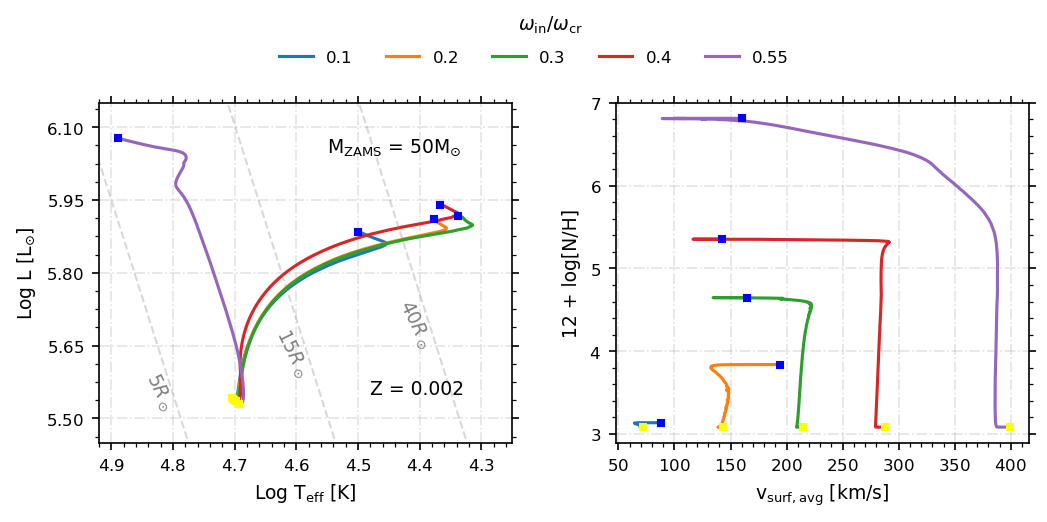

In [44]:
plt.style.use('./mesa_styles/mesa.mplstyle12')
Rot_dir = [0.1, 0.2, 0.3, 0.4, 0.55]

plt.figure(figsize = (8,3))
gs = gridspec.GridSpec(1,2, hspace = 0, wspace = 0.25)#, width_ratios = [3, 3])

plt.subplot(gs[0])
for j in range(len(Rot_dir)):
    directory = './Data_fig_1/Z002-Rot-' + str(Rot_dir[j]) + '/LOGS' + '/'  #location of a specific LOGS folder

    data = pd.read_csv(directory + 'history.data', header  = 4, delim_whitespace=True, low_memory=False)
    for i in range(len(data)):
        if data.loc[i,'center_h1'] <= 1e-10:
            x = data.loc[0:i,'log_Teff']
            y = data.loc[0:i,'log_L']
            break
        else:
            x = data.loc[:,'log_Teff']
            y = data.loc[:,'log_L']
    plt.plot(x, y)
plt.legend(Rot_dir,  ncol = 5, loc= 'upper left', bbox_to_anchor=(0.4, 1.2), fontsize = 8)
plt.text(4.24, 6.3, '$\omega_{\\rm in}$/$\omega_{\\rm cr}$')

#for the end points:
for j in range(len(Rot_dir)):
    directory = './Data_fig_1/Z002-Rot-' + str(Rot_dir[j]) + '/LOGS' + '/'  #location of a specific LOGS folder
    data = pd.read_csv(directory + 'history.data', header  = 4, delim_whitespace=True, low_memory=False)
    for i in range(len(data)):
        if data.loc[i,'center_h1'] <= 1e-10:
            plt.plot(data.loc[0,'log_Teff'], data.loc[0,'log_L'], marker = 's', markersize = 3, color = 'yellow')
            plt.plot(data.loc[i,'log_Teff'], data.loc[i,'log_L'], marker = 's', markersize = 3, color = 'blue')
            break
    

plt.xlabel('Log T$_{\\rm eff}$ [K]')
plt.ylabel('Log L [L$_{\odot}$]')
plt.text(4.55, 6.05, 'M$_{\\rm ZAMS}$ = 50M$_{\odot}$')
plt.text(4.48, 5.55, 'Z = 0.002')
plt.grid(linestyle = '-.', alpha = 0.35)
plt.yticks(np.arange(0.55, 6.15, 0.15))

# For lines of const radius
T = np.arange(1e3,1e6,1000)
logL = []
R = [5, 15, 40]
for i in range(len(R)):
    logL = np.log10((R[i]**2)*((T/5780)**4))  
    logT = np.log10(T)
    plt.plot(logT,logL, linestyle = '--', color = 'grey', linewidth = 1, alpha = 0.3)
    
plt.text(4.85,5.57,"$5R_\\odot$",color="0.5", rotation=-64)
plt.text(4.64,5.66,"$15R_\\odot$",color="0.5", rotation=-64)
plt.text(4.44,5.72,"$40R_\\odot$",color="0.5", rotation=-64)
plt.xlim(4.25,4.92)
plt.ylim(5.45,6.15)
plt.gca().invert_xaxis()

plt.subplot(gs[1])
# Plotting surface abundance
for j in range(len(Rot_dir)):
    directory = './Data_fig_1/Z002-Rot-' + str(Rot_dir[j]) + '/LOGS' + '/'  #location of a specific LOGS folder
    data = pd.read_csv(directory + 'history.data', header  = 4, delim_whitespace=True, low_memory=False)
    for i in range(len(data)):
        if data.loc[i,'center_h1'] <= 1e-10:
            plt.plot(data.loc[:i,'surf_avg_v_rot'], 12 + np.log(data.loc[:i,'surface_n14']/data.loc[:i,'surface_h1']))
            break
            
#for the end points:
for j in range(len(Rot_dir)):
    directory = './Data_fig_1/Z002-Rot-' + str(Rot_dir[j]) + '/LOGS' + '/'  #location of a specific LOGS folder
    data = pd.read_csv(directory + 'history.data', header  = 4, delim_whitespace=True, low_memory=False)
    for i in range(len(data)):
        if data.loc[i,'center_h1'] <= 1e-10:
            plt.plot(data.loc[0,'surf_avg_v_rot'], 12 + np.log(data.loc[0,'surface_n14']/data.loc[0,'surface_h1']),\
                                                               marker = 's', markersize = 3, color = 'yellow')
            plt.plot(data.loc[i,'surf_avg_v_rot'], 12 + np.log(data.loc[i,'surface_n14']/data.loc[i,'surface_h1']),\
                                                               marker = 's', markersize = 3, color = 'blue')
            break            
            
plt.grid(linestyle = '-.', alpha = 0.35)
plt.xlabel('v$_{\\rm surf, avg}$ [km/s]')
plt.ylabel('12 + log[N/H]')
plt.yticks(np.arange(3, 7.1, 1))
# plt.legend(Rot_dir,  ncol = 5, loc= 'upper left', bbox_to_anchor=(-0.02, 1.2))       
        

plt.savefig('./Pics/Rotation_HR_diagram_plus_surf_anomolies.jpg')

## Figure 2

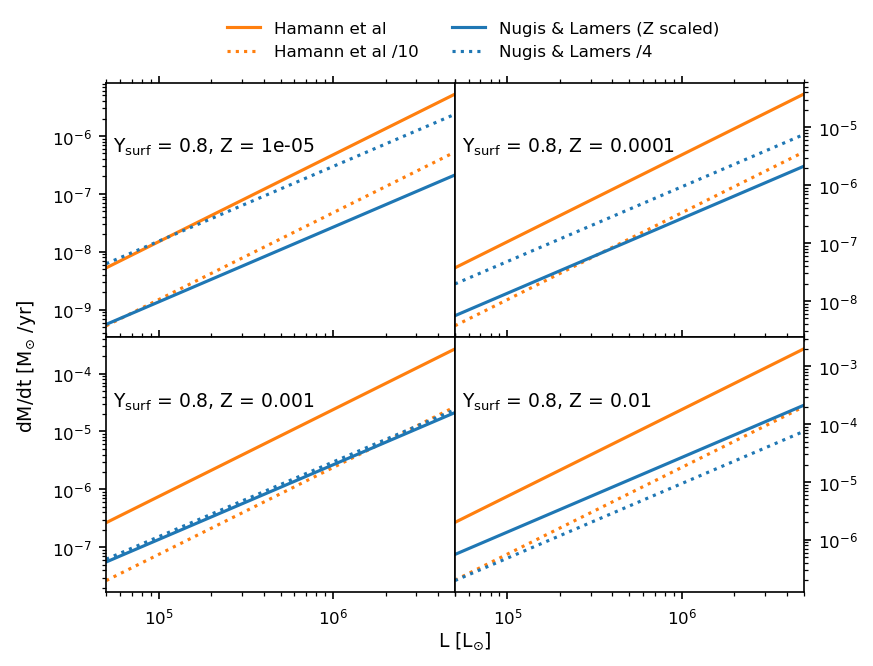

In [45]:
plt.style.use('./mesa_styles/mesa.mplstyle12')
plt.figure(figsize = (6,4.5))
gs = gridspec.GridSpec(2,2, hspace = 0, wspace = 0)


# Xs = 0.3
Zsun = 0.02
Lsun = 1
L = [5e4, 1e5, 5e5, 1e6, 5e6]

Y = 0.8
Z = [1e-5, 1e-4, 1e-3, 1e-2]


for k in range(len(Z)):
    ax = plt.subplot(gs[k])
    Xs = 1 - Y - Z[k]
    w = []
    w1 = []
    w2 = []
    w3 = []
    w4 = []
    for i in range(len(L)):
        log10w = -11.95 \
             +1.5*math.log10(L[i]/Lsun) \
             -2.85*Xs \
             + 0.85*math.log10(Z[k]/Zsun)

        w.append(10**(log10w))
        w1.append(10**(log10w)/10)

    #     Y = 1 - Xs - Z
#         w_solar = (L[i]/Lsun)**(1.29) * Y**(1.7)*(0.02)**(0.5)
        w2.append( np.sqrt(Z[k]/0.02) *1e-11 * (L[i]/Lsun)**(1.29) * Y**(1.7)*(Z[k])**(0.5) )
        
        w3.append(  0.25 * 1e-11 * (L[i]/Lsun)**(1.29) * Y**(1.7)*Z[k]**(0.5) )
#         w4.append(  0.1 * 1e-11 * (L[i]/Lsun)**(1.29) * Y**(1.7)*Z[k]**(0.5) )

    plt.plot(L, w, color = '#ff7f0e')
    plt.plot(L, w1, color = '#ff7f0e', linestyle = ':') 
    plt.plot(L, w2, color = '#1f77b4')  
    plt.plot(L, w3, color = '#1f77b4', linestyle = ':') 
#     plt.plot(L, w4, color = '#1f77b4', linestyle = ':') 
    plt.xscale('log')
    plt.yscale('log')
    plt.xlim(5e4, 5e6)
    
    ax.text(5.5e4, w1[4], 'Y$_{\\rm surf}$ = 0.8, Z = ' + str(Z[k]))
    
    
    if k == 2:
        plt.text(4e6, 2e-9, 'L [L$_{\\odot}$]')
        plt.text(1.5e4, 1e-3,'dM/dt [M$_{\\odot}$ /yr]', rotation = 90)
    if k ==1 or k ==3:
        ax.yaxis.tick_right()
        
plt.legend(['Hamann et al', 'Hamann et al /10', 'Nugis & Lamers (Z scaled)',  \
            'Nugis & Lamers /4', 'Nugis & Lamers /10'],
                                           bbox_to_anchor = (0.8,2.3), ncol = 2)
plt.savefig('Pics/Mdot_comparison.jpg')

## Figure 3

In [8]:
z = ['zem5', 'zem4', 'z001']
Z = [1e-5, 1e-4, 1e-3]
dir_efficient = './Efficient_AM_mixing'

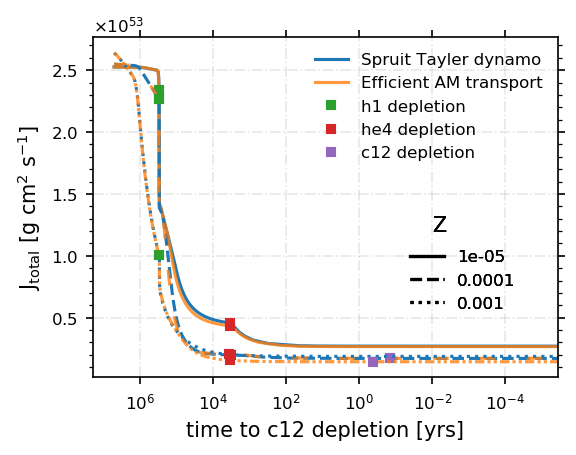

In [11]:
plt.style.use('./mesa_styles/mesa.mplstyle13')
plt.figure(figsize = (4,3))
lines = ['-', '--', ':']
lines_eff = ['-', (0, (5, 10)), (0, (3, 1, 1, 1, 1, 1))]
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']
for i in range(0,3):
#     file_path = f'{dir_normal}/{z[i]}/60.0/LOGS/history.data'
    file_path = f'{dir_efficient}/{z[i]}/{1}/LOGS/history.data'
    df = pd.read_csv( file_path, delim_whitespace=True, header = 4)
    
    for h in range(len(df)):
        if df.loc[h,'center_h1'] < 1e-3:
            break

    for he in range(len(df)):
        if df.loc[he,'center_he4'] < 1e-3:
            break

    for c in range(len(df)):
        if df.loc[c,'center_c12'] < 8e-2 and df.loc[c,'center_he4'] < 1e-3:
#             print(c)
            break
            
#     file_path_eff = f'{dir_efficient}/{i+1}/LOGS/history.data'
    file_path_eff = f'{dir_efficient}/{z[i]}/{2}/LOGS/history.data'
    df_eff = pd.read_csv(file_path_eff, delim_whitespace=True, header = 4)
    
    
    for h1 in range(len(df_eff)):
        if df_eff.loc[h1,'center_h1'] < 1e-3:
            break

    for he1 in range(len(df_eff)):
        if df_eff.loc[he1,'center_he4'] < 1e-3:
            break

    for c1 in range(len(df_eff)):
        if df_eff.loc[c1,'center_c12'] < 8e-2 and df_eff.loc[c1,'center_he4'] < 1e-3:
            break
            
#     for o1 in range(len(df)):
#         if df_eff.loc[o,'center_o16'] < 1e-1 and df_eff.loc[o,'center_he4'] < 1e-5 and df_eff.loc[c,'center_c12'] < 1e-2:
#             break
            
    
    

    plt.plot(abs(df.loc[:,'star_age'] - df.loc[len(df) -1,'star_age']), 10**df.loc[:,'log_total_angular_momentum'], linestyle = lines[i], \
                                                                                     color = colors[0])
    plt.plot(abs(df_eff.loc[:,'star_age'] - df_eff.loc[len(df_eff) -1,'star_age']), 10**df_eff.loc[:,'log_total_angular_momentum'], linestyle = lines_eff[i], \
                                                                                 color = colors[1], alpha = 0.8)
    plt.plot(abs(df.loc[h,'star_age'] - df.loc[len(df) -1,'star_age']), 10**df.loc[h,'log_total_angular_momentum'], marker = 's',markersize = 4, \
                                                                     linestyle = '', color = colors[2])
    plt.plot(abs(df.loc[he,'star_age'] - df.loc[len(df) -1,'star_age']), 10**df.loc[he,'log_total_angular_momentum'], marker = 's',markersize = 4, \
                                                                         linestyle = '', color = colors[3])
    plt.plot(abs(df.loc[c,'star_age'] - df.loc[len(df) -1,'star_age']), 10**df.loc[c,'log_total_angular_momentum'], marker = 's',markersize = 4, \
                                                                linestyle = '', color = colors[4], alpha = 1)
#     plt.plot(df.loc[o,'star_age'], 10**df.loc[c,'log_total_angular_momentum'], marker = 's',markersize = 4, \
#                                                                  linestyle = '', color = colors[5], alpha = 0.5)
    plt.plot(abs(df_eff.loc[h1,'star_age'] - df_eff.loc[len(df_eff) -1,'star_age']), 10**df_eff.loc[h1,'log_total_angular_momentum'], marker = 's',markersize = 4, \
                                                                     linestyle = '', color = colors[2])
    plt.plot(abs(df_eff.loc[he1,'star_age'] - df_eff.loc[len(df_eff) -1,'star_age']), 10**df_eff.loc[he1,'log_total_angular_momentum'], marker = 's',markersize = 4, \
                                                                         linestyle = '', color = colors[3])
    plt.plot(abs(df_eff.loc[c1,'star_age'] - df_eff.loc[len(df_eff) -1,'star_age']), 10**df_eff.loc[c1,'log_total_angular_momentum'], marker = 's',markersize = 4, \
                                                                linestyle = '', color = colors[4], alpha = 1)
    
    plt.gca().invert_xaxis()
    plt.xscale('log')
    plt.xlabel('time to c12 depletion [yrs]')
    plt.ylabel('J$_{\\rm total}$ [g cm$^{2}$ s$^{-1}$]')
    
  
    from matplotlib.lines import Line2D
    line = [Line2D([0], [0], color='k', linestyle='-'),
             Line2D([0], [0], color='k', linestyle='--'),
             Line2D([0], [0], color='k', linestyle=':')]
    legend1 = plt.legend(line, Z, ncol = 1, bbox_to_anchor = (0.65,0.15), fontsize = 8)
    plt.legend(['Spruit Tayler dynamo', 'Efficient AM transport', 'h1 depletion', 'he4 depletion', \
                'c12 depletion'])
    plt.text(1e-2, 1.2e53, 'Z')
    plt.gca().add_artist(legend1)
    plt.grid(linestyle = '-.', alpha = 0.3)
plt.savefig('Pics/ST_dynamo_vs_efficient_AM_transport.jpg')

## Figure 4

In [12]:
def Check_CHE(history_path, col_num):
    data = pd.read_csv(history_path, header  = 4, delim_whitespace=True, low_memory=False)
    if abs(data.loc[col_num ,'center_he4'] - data.loc[col_num,'surface_he4']) <= 0.2:
        return 1
    else:
        return 0

In [13]:
def polyfits(x, y, color):
    model = np.polyfit(x, y,3)
    model_function = np.poly1d(model)
    plt.plot(x, model_function(x), color = color)
    print(model_function)
    return model_function

In [14]:
mass_dir = np.arange(15,300,5.0)
z = ['zem5', 'zem4',  '3zem4', '6zem4', 'z001', 'z002', 'z003', 'z004', 'z005', 'z006']
Z = [0.00001, 0.0001,  0.0003, 0.0006, 0.001, 0.002, 0.003, 0.004, 0.005,  0.006]

In [15]:
## Allowed rotation velocities (used in naming directories)
Rot_dir = np.arange(0.38,0.98,0.02)
# Rot_dir

### Need to produce the models before running the below cell. The results have already been stored in the subsequent cell. The MESA inlist to produce the models have been provided.

In [ ]:
#*************************Using the histroy file to check for CHE********************************
CHE_omega_threshold = [[] for i in range(len(Z))]
mass_omega_threshold = [[] for i in range(len(Z))]
omega_div_omega_crit = [[] for i in range(len(Z))]
surf_avg_v_rot = [[] for i in range(len(Z))]
surf_avg_v_rot_at_TAMS = [[] for i in range(len(Z))]
initial_rot = [[] for i in range(len(Z))]

for metal in range(len(Z)):
    print(z[metal])
    for l in range(len(mass_dir)):
        Flag = True
        for j in range(len(Rot_dir)):
            return_val = 0
            col_num = 0
        
#             directory = '.high_Z_models_with_max_rot_BOOST_LOWERED/Makemodels_MS/Rot-' + str(Rot_dir[j]) + '/'+ z[metal] + '/' + z[metal] + '-' \
            directory = './Dutch_variable/Makemodels_MS/Rot-' + str(Rot_dir[j]) + '/'+ z[metal] + '/' + z[metal] + '-' \
            + str(mass_dir[l]) +  '/LOGS' + '/history.data'  #location of a specific LOGS folder
            if os.path.exists(directory):
                data = pd.read_csv(directory, header  = 4, delim_whitespace=True, low_memory=False)

                for i in range(len(data.loc[:,'model_number'])):
                    if data.loc[i,'H_cntr'] <= 1e-4:
                        return_val = Check_CHE(directory, i)
                        break

                if return_val == 1:  # if this then store and break (ie. don't need to look at large rotations, else
                    # keep looking)
                    CHE_omega_threshold[metal].append(data.loc[i,'surf_avg_omega']) #At CHE point
                    omega_div_omega_crit[metal].append(data.loc[i,'surf_avg_omega_div_omega_crit']) #At CHE point
                    surf_avg_v_rot_at_TAMS[metal].append(np.round(data.loc[i, 'surf_avg_v_rot'],2)) # At CHE
                    surf_avg_v_rot[metal].append(np.round(data.loc[0, 'surf_avg_v_rot'], 2))
                    mass_omega_threshold[metal].append(mass_dir[l]) #Initial Mass 
                    initial_rot[metal].append(Rot_dir[j]) #Initial omega for CHE
                    break

In [20]:
## Data printed to save for later.

# import copy
# mass_threshold = [[] for i in range(len(Z))]
# Min_omega = [[] for i in range(len(Z))]
# Surf_avg_v_rot_at_TAMS = [[] for i in range(len(Z))]
# Surf_avg_v_rot = [[] for i in range(len(Z))]
# for k in range(len(Z)):
# #     if Z[k] >= 4e-3:
#     mass_threshold[k]            = copy.deepcopy(mass_omega_threshold[k])
#     Min_omega[k]                 = copy.deepcopy(initial_rot[k])
#     Surf_avg_v_rot_at_TAMS[k]    = copy.deepcopy(surf_avg_v_rot_at_TAMS[k])
#     Surf_avg_v_rot[k]            = copy.deepcopy(surf_avg_v_rot[k])
    
# # print('mass_threshold = ', mass_threshold)
# # print('\nMin_omega = ', Min_omega)
# # print('\nsurf_avg_v_rot_at_TAMS = ', Surf_avg_v_rot_at_TAMS)
# # print('\nsurf_avg_v_rot = ', Surf_avg_v_rot)

## Below is the result one would get by running the above bit

In [16]:
mass_threshold =  [[15.0, 25.0, 35.0, 45.0, 55.0, 65.0, 75.0, 85.0, 95.0, 105.0, 115.0, 125.0, 135.0, 150.0, 175.0, 200.0, 225.0, 250.0, 275.0],
[15.0, 25.0, 35.0, 45.0, 55.0, 65.0, 75.0, 85.0, 95.0, 105.0, 115.0, 125.0, 135.0, 150.0, 175.0, 200.0, 225.0, 250.0, 275.0],
[15.0, 25.0, 35.0, 45.0, 55.0, 65.0, 75.0, 85.0, 95.0, 105.0, 115.0, 125.0, 135.0, 150.0, 175.0, 200.0, 225.0, 250.0, 275.0],
[15.0, 25.0, 35.0, 45.0, 55.0, 65.0, 75.0, 85.0, 95.0, 105.0, 115.0, 125.0, 135.0, 150.0, 175.0, 200.0, 225.0, 250.0, 275.0],
[15.0, 25.0, 35.0, 45.0, 55.0, 65.0, 75.0, 85.0, 95.0, 105.0, 115.0, 125.0, 135.0, 150.0, 175.0, 200.0, 225.0, 250.0],
[25.0, 35.0, 45.0, 55.0, 65.0, 75.0, 85.0, 95.0, 105.0, 115.0, 125.0, 135.0, 150.0, 175.0],
[65.0, 75.0, 85.0, 95.0, 105.0, 115.0, 125.0, 135.0, 150.0, 175.0],
[55.0, 65.0, 75.0, 85.0, 95.0, 105.0, 115.0, 125.0, 135.0],
[55.0, 65.0, 75.0, 85.0, 95.0, 105.0, 115.0, 125.0],
[95.0]]

Min_omega =  [[0.58, 0.48, 0.48, 0.44, 0.44, 0.42, 0.4, 0.42, 0.42, 0.42, 0.42, 0.42, 0.42, 0.42, 0.42, 0.44, 0.46, 0.48, 0.54],
[0.6, 0.52, 0.48, 0.44, 0.44, 0.42, 0.42, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.42, 0.42, 0.46, 0.48, 0.54],
[0.62, 0.52, 0.48, 0.46, 0.44, 0.44, 0.42, 0.42, 0.42, 0.4, 0.4, 0.42, 0.42, 0.42, 0.44, 0.46, 0.5, 0.54, 0.6],
[0.66, 0.54, 0.5, 0.46, 0.46, 0.44, 0.44, 0.42, 0.42, 0.42, 0.42, 0.42, 0.42, 0.44, 0.48, 0.5, 0.54, 0.6, 0.68],
[0.68, 0.54, 0.52, 0.48, 0.46, 0.46, 0.46, 0.46, 0.46, 0.44, 0.46, 0.46, 0.48, 0.5, 0.56, 0.6, 0.66, 0.74],
[0.6, 0.54, 0.54, 0.52, 0.52, 0.52, 0.52, 0.52, 0.54, 0.54, 0.58, 0.6, 0.64, 0.72],
[0.62, 0.58, 0.6, 0.6, 0.62, 0.64, 0.68, 0.72, 0.8, 0.94],
[0.66, 0.66, 0.68, 0.68, 0.7, 0.72, 0.76, 0.84, 0.88],
[0.72, 0.72, 0.76, 0.78, 0.8, 0.82, 0.88, 0.94],
[0.94]]


surf_avg_v_rot_at_TAMS =  [[812.97, 840.25, 848.17, 847.72, 855.47, 849.82, 838.23, 849.43, 846.71, 844.09, 837.42, 833.61, 826.0, 674.82, 691.87, 605.24, 620.23, 602.36, 570.69],
[730.94, 742.16, 742.11, 701.27, 705.75, 690.8, 704.25, 689.22, 698.61, 715.8, 727.45, 738.39, 731.66, 713.75, 715.97, 558.33, 558.86, 530.11, 470.71],
[652.64, 590.57, 570.13, 556.35, 538.09, 538.14, 521.8, 525.73, 523.98, 516.17, 521.37, 528.45, 526.94, 567.33, 626.51, 633.97, 561.32, 574.44, 358.6],
[536.81, 481.81, 450.79, 425.79, 418.6, 405.58, 398.77, 384.84, 383.73, 383.29, 405.05, 408.77, 453.03, 469.17, 449.15, 463.34, 313.56, 241.07, 197.63],
[431.84, 380.86, 357.78, 334.65, 335.94, 303.49, 290.93, 284.63, 286.61, 301.57, 292.07, 305.74, 305.29, 304.05, 237.46, 193.18, 183.24, 83.28],
[275.97, 238.65, 214.24, 188.77, 166.77, 153.1, 140.13, 113.3, 145.28, 82.56, 87.96, 71.5, 44.68, 41.51],
[100.85, 79.94, 58.77, 52.97, 73.98, 48.84, 35.58, 19.63, 28.75, 16.79],
[53.4, 48.11, 28.15, 18.08, 29.49, 23.21, 14.88, 15.25, 13.32],
[24.64, 18.37, 16.67, 10.74, 12.22, 9.4, 9.57, 9.23]]

surf_avg_v_rot =  [[495.49, 427.28, 440.23, 414.05, 423.57, 412.49, 397.61, 422.05, 423.7, 426.93, 429.17, 431.41, 432.1, 433.74, 434.84, 456.21, 476.67, 488.71, 426.16],
[469.56, 418.84, 394.99, 367.92, 372.44, 359.18, 362.23, 347.63, 347.92, 348.12, 347.66, 348.3, 348.74, 346.89, 362.87, 360.75, 390.89, 394.37, 421.96],
[473.55, 406.65, 379.74, 366.17, 353.07, 353.42, 338.82, 336.95, 336.25, 318.71, 316.47, 331.37, 328.87, 325.76, 334.32, 343.48, 363.55, 374.48, 387.5],
[501.08, 413.38, 386.55, 356.49, 356.65, 340.16, 339.33, 320.63, 318.24, 314.86, 310.7, 307.05, 303.68, 312.3, 330.46, 332.99, 344.55, 358.57, 368.3],
[520.51, 409.63, 394.77, 362.91, 346.0, 341.14, 336.78, 331.38, 325.02, 304.33, 311.88, 305.72, 312.47, 314.87, 334.65, 338.53, 347.13, 350.57],
[449.17, 401.7, 393.66, 371.35, 362.93, 350.1, 339.97, 327.46, 315.04, 315.89, 326.11, 324.71, 325.54, 329.99],
[414.83, 372.01, 366.0, 349.09, 342.93, 335.39, 336.86, 337.23, 345.07, 351.39],
[446.81, 424.7, 412.43, 395.02, 379.69, 363.35, 356.19, 366.64, 355.54],
[495.68, 463.12, 456.58, 435.44, 411.97, 388.8, 382.77, 375.47]]

## Ploting the above data

In [17]:
Z = [0.00001, 0.0001,  0.0003, 0.0006, 0.001, 0.002, 0.003, 0.004, 0.005]
colors = plt.cm.Spectral(np.linspace(0,1,len(Z)))

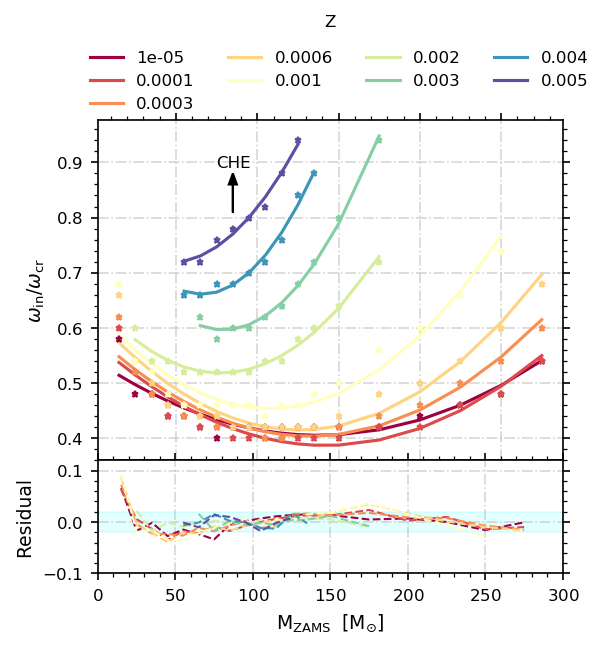

In [21]:
plt.style.use('./mesa_styles/mesa.mplstyle12')

plt.figure(figsize = (4,4))
import matplotlib.gridspec as gridspec
gs = gridspec.GridSpec(2,1, hspace = 0, wspace = 0, height_ratios = [3, 1])

model_functions = []
plt.subplot(gs[0])
coefficients = []
for k in range(len(Z)):
    #     fitting relation 
    model = np.polyfit(mass_threshold[k], Min_omega[k],2)
    model_function = np.poly1d(model)
    plt.plot(mass_threshold[k], model_function(mass_threshold[k]), color = colors[k])
#     plt.xlabel('M$_{\\rm ZAMS}\; $ [M$_{\odot}$]')
    plt.ylabel('$\omega_{\\rm in} / \omega_{\\rm cr}}$')
    coefficients.append(model)
#     print(model_function)
    model_functions.append(model_function)
    
for k in range(len(Z)):    
    plt.plot(mass_threshold[k], Min_omega[k], color = colors[k], marker = '*', linestyle = '')
    

plt.title('Z', pad = 45, fontsize = 8)
plt.grid(linestyle = '-.', alpha = 0.5)
plt.ylim(0.36)
plt.legend(Z, bbox_to_anchor=(-0.05, 1.25), ncol = 4, loc = 'upper left')

plt.arrow( 85, 0.81, 0.0, 0.05, fc="k", ec="k",head_width=5, head_length=0.02 )
plt.text(75, 0.89, 'CHE', fontsize = 8)

residual = []
plt.subplot(gs[1])
for k in range(len(Z)):    
#     plt.plot(mass_threshold[k], Min_omega[k] - model_function(mass_threshold[k]), color = colors[k], \
#                                                          marker = '*', linestyle = '')
    model_function1 = model_functions[k]
    residual.append(Min_omega[k] - model_function1(mass_threshold[k]))
    plt.plot(mass_threshold[k], Min_omega[k] - model_function1(mass_threshold[k]), color = colors[k], \
                                                           marker = '', linestyle = '--', linewidth = 1)
    plt.grid(linestyle = '-.', alpha = 0.5)
    plt.xlabel('M$_{\\rm ZAMS}\; $ [M$_{\odot}$]')
    plt.ylabel('Residual')
    plt.ylim(-0.1,0.12)
    
    plt.fill_between([0,300], 0.02, -0.02, color = 'cyan', alpha = 0.01)
    plt.xlim(0,300)
# print(residual)

# plt.savefig('Pics/Threshold_omega_for_CHE_BPASS_winds.jpg')

## Below we do the fit

In [22]:
temp = np.array(coefficients)
# temp

alpha = np.round(abs(temp[:,0]),9)
beta = np.round(abs(temp[:,1]),7)
gamma = np.round(abs(temp[:,2]),4)
# print(alpha)
# print(beta)
# print(gamma)

            3             2
-1.692e+07 x + 2.853e+04 x + 571.5 x - 11.7
            3             2
-3.391e+07 x + 1.602e+05 x + 108.2 x - 6.01
            3             2
-1.021e+07 x + 5.753e+04 x + 35.43 x - 0.5649


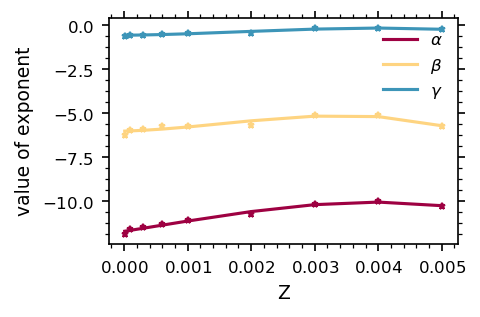

In [31]:
plt.figure(figsize = (3,2))
Z = [0.00001, 0.0001,  0.0003, 0.0006, 0.001, 0.002, 0.003, 0.004, 0.005]
Z_new = np.array(Z)

alpha_new = np.log(alpha)
beta_new = np.log(beta)
gamma_new = np.log(gamma)

#  call fitting relation 
c0 = polyfits(Z_new, alpha_new, colors[0])
c1 = polyfits(Z_new, beta_new, colors[3])
c2 = polyfits(Z_new, gamma_new, colors[7])


plt.plot(Z_new, alpha_new, linestyle = '', marker = '*', color = colors[0])
plt.plot(Z_new, beta_new, linestyle = '', marker = '*', color = colors[3])
plt.plot(Z_new, gamma_new, linestyle = '', marker = '*', color = colors[7])

# plt.grid(linestyle = '-.', alpha = 0.5)
plt.xlabel('Z')
plt.ylabel('value of exponent')
plt.legend(['$\\alpha$', '$\\beta$', '$\\gamma$'])

# x below represents Z

## This is the final fit - Figure 4

<Figure size 750x600 with 0 Axes>

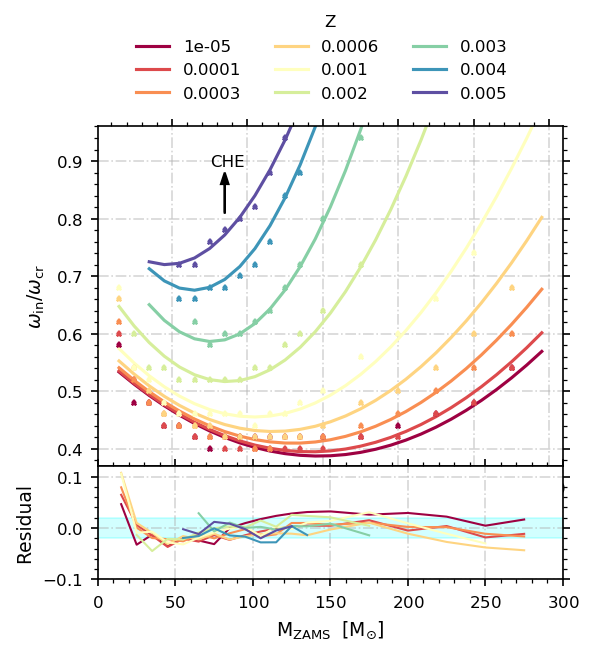

In [32]:
plt.figure(figsize = (5,4))

M = np.arange(15,300,10)
Z = [0.00001, 0.0001,  0.0003, 0.0006, 0.001, 0.002, 0.003, 0.004, 0.005]
i = 0
residual = []

plt.style.use('./mesa_styles/mesa.mplstyle12')
plt.figure(figsize = (4,4))
import matplotlib.gridspec as gridspec
gs = gridspec.GridSpec(2,1, hspace = 0, wspace = 0, height_ratios = [3, 1])


plt.subplot(gs[0])
for z in (Z):
    if z in [0.003, 0.004, 0.005, 0.006]:
#         print('y')
        M = np.arange(35,301,10)
    else:
        M = np.arange(15,301,10)
#     if z in [0.002, 0.003, 0.004, 0.005]:
#         M = np.array(mass_threshold[5])
#     else:
#         M = np.array(mass_threshold[i])
#     M = np.array(mass_threshold[i])
    omega_CHE = np.exp(c0(z))*(M**2) - np.exp(c1(z))*(M) + np.exp(c2(z))
    plt.plot(M, omega_CHE, color = colors[i] )
    
    M = np.array(mass_threshold[i])
    omega_CHE = np.exp(c0(z))*(M**2) - np.exp(c1(z))*(M) + np.exp(c2(z))
    residual.append(Min_omega[i] - omega_CHE)
    
    i += 1
plt.ylim(0.37,0.96)
plt.xlabel('M$_{\\rm ZAMS \;}$ [M$_{\odot}$]')
plt.ylabel('$\omega_{\\rm in} / \omega_{\\rm cr}$')
plt.title('Z', pad = 48, fontsize = 8)


plt.legend(Z, bbox_to_anchor=(0.05, 1.3), ncol = 3, loc = 'upper left', fontsize = 8)
plt.grid(linestyle = '-.', alpha = 0.5)

for k in range(len(Z)):    
    plt.plot(mass_threshold[k], Min_omega[k], color = colors[k], marker = '*', markersize = 2.5, linestyle = '')
    
plt.arrow( 85, 0.81, 0.0, 0.05, fc="k", ec="k",head_width=5, head_length=0.02 )
plt.text(75, 0.89, 'CHE', fontsize = 8)
    
plt.subplot(gs[1])
for k in range(len(Z)):    
    plt.plot(mass_threshold[k], residual[k], color = colors[k], marker = '', linestyle = '-', linewidth = 1)
    plt.grid(linestyle = '-.', alpha = 0.5)
    plt.xlabel('M$_{\\rm ZAMS}\; $ [M$_{\odot}$]')
    plt.ylabel('Residual')
    plt.ylim(-0.1,0.12)
    
    plt.fill_between([0,300], 0.02, -0.02, color = 'cyan', alpha = 0.02)
    plt.xlim(0,300)

# plt.ylim()
plt.savefig('Pics/Threshold_omega_for_CHE_BPASS_winds.jpg')   

## Figure 5`

In [39]:
# Efficiency of angular momentum accretion/transport 
nu = [1, 0.5, 0.25, 0.1]
rg = np.sqrt([0.05, 0.1])  # radius of gyration
ratio_initial = 0.  # initial angular velocity to critical velocity ratio (prior to accretion)

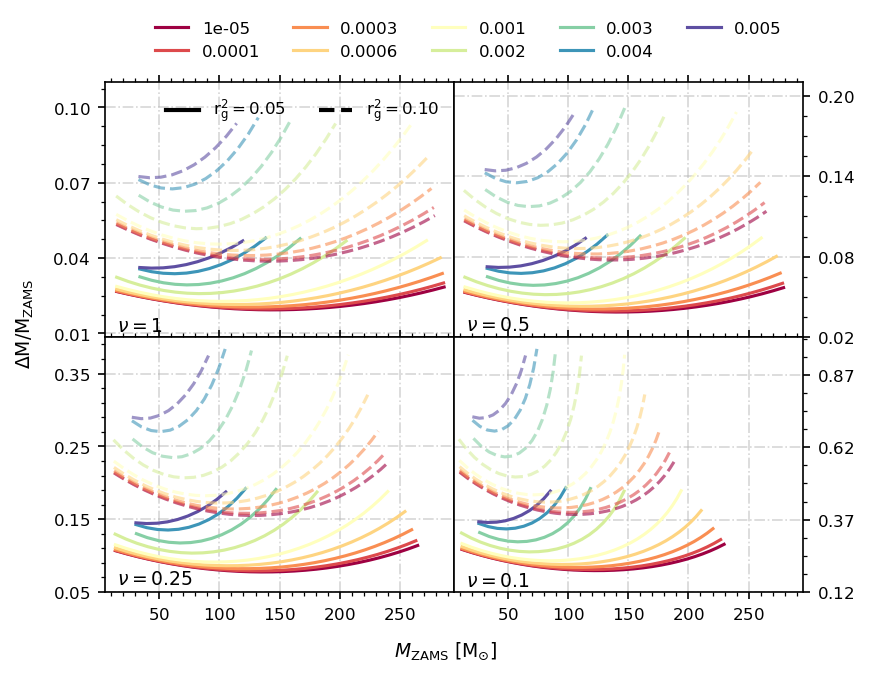

In [40]:
import matplotlib.gridspec as gridspec
plt.style.use('./mesa_styles/mesa.mplstyle12')
plt.figure(figsize = (6,4.5))
gs = gridspec.GridSpec(2,2,hspace = 0, wspace = 0)
for j in range(4):
    ax = plt.subplot(gs[j])
    i = 0
    for z in Z:
        r = rg[0]
#         M = np.array(mass_threshold[i])
        if z >= 0.003:
            M = np.arange(35,301,10)
        else:
            M = np.arange(15,301,10)
  
        ratio = np.exp(c0(z))*(M**2) - np.exp(c1(z))*(M) + np.exp(c2(z))
        for k in range(len(ratio)):
            if ratio[k] > .98:
                ratio = ratio[:k]
                M = M[:k]
                break
        
        #ratio = Wche/Wcr
        ratio = ( np.exp(c0(z))*(M**2) - np.exp(c1(z))*(M) + np.exp(c2(z)) ) / nu[j]
        q = np.sqrt((1/4)*( ((r**2)*ratio) + 1)**2 - (r**2)*(ratio_initial / nu[j])) - (0.5 - ((r**2)/2)*(ratio))
        plt.plot(M/(1+q), q, linestyle = '-', color = colors[i], linewidth = 1.5)
        i +=1

    i = 0
    for z in Z:
        r = rg[1]
#         M = np.array(mass_threshold[i])
        if z >= 0.003:
            M = np.arange(35,301,10)
        else:
            M = np.arange(15,301,10)
  
        ratio = np.exp(c0(z))*(M**2) - np.exp(c1(z))*(M) + np.exp(c2(z))
        for k in range(len(ratio)):
            if ratio[k] > .98:
                ratio = ratio[:k]
                M = M[:k]
                break
                
        #ratio = Wche/Wcr
        ratio = ( np.exp(c0(z))*(M**2) - np.exp(c1(z))*(M) + np.exp(c2(z)) ) / nu[j]
        q = np.sqrt((1/4)*( ((r**2)*ratio) + 1)**2 - (r**2)*(ratio_initial / nu[j])) - (0.5 - ((r**2)/2)*(ratio))
        plt.plot(M/(1+q), q, linestyle = '--', color = colors[i], alpha = 0.6, linewidth = 1.5)
        i +=1
    
    if j == 0:
        from matplotlib.lines import Line2D
        lines = [Line2D([0], [0], color='k', linewidth = 2, linestyle='-'),
                 Line2D([0], [0], color='k', linewidth = 2, linestyle='--')]
        legend1 = plt.legend(lines, ['r$_{\\rm g}^{2} = 0.05$', 'r$_{\\rm g}^{2} = 0.10$'],\
                             ncol = 2, loc = 'upper right', fontsize = 8)
        plt.legend(Z, bbox_to_anchor=(0.1, 1.3), ncol = 5, loc = 'upper left', fontsize = 8)
        plt.gca().add_artist(legend1)
#         plt.title('Z', pad = 50, fontsize = 9)
        
        ax.set_ylim(0.0085,0.11)
        plt.xlim(0,300)
        plt.text(15, 0.011, '$\\nu = 1$')
#         ax.axes.get_xaxis().set_ticks([])
        plt.yticks(np.arange(0.01, 0.11, 0.03))
        ax.yaxis.tick_left()
        
    if j == 1:
        ax.set_ylim(0.02,0.21)
        plt.text(15, 0.025, '$\\nu = 0.5$')
        ax.yaxis.tick_right()
#         ax.axes.get_xaxis().set_ticks([])
        plt.yticks(np.arange(0.02, 0.21, 0.06))
    if j == 2:
        ax.set_ylim(0.05,0.4)
        plt.text(15, 0.06, '$\\nu = 0.25$')
        ax.yaxis.tick_left()
        plt.yticks(np.arange(0.05, 0.4, 0.1))
    if j == 3:
        ax.set_ylim(0.12,1)
        plt.text(15, 0.14, '$\\nu = 0.1$')
        ax.yaxis.tick_right()
        plt.yticks(np.arange(0.12, 1, 0.25))
        
    plt.xlim(5,295)
    plt.grid(linestyle = '-.', alpha = 0.5)
        

plt.text(-45, -.1, '$M_{\\rm ZAMS}$ [M$_{\odot}$]')
plt.text(-360, 1.15, '$\Delta$M/M$_{\\rm ZAMS}$', rotation = 90)


plt.savefig('Pics/Accretion_CHE_BPASS_winds_new.jpg')